<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Phyton_kriring: optimización de sensores </font>
</div>

- **Fecha**: 2023/05/04
        
- **Objetivos**: optimización de la ubicación de sensores
- **Descripción** Desarrollo

- **Referencias**: -

- **Autores**: 
    - Luis Miguel Sánchez Brea

In [68]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
import numpy as np

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [70]:
from matplotlib import rcParams

rcParams['figure.dpi'] = 160
rcParams['lines.markersize']=10
rcParams['image.cmap']='hot'
rcParams['figure.figsize']=(8,8)

%matplotlib inline


# Esquema

1. Cargar una imagen
2. Asignar un espacio xy
3. Generar una Medida distribuida
4. Determinar número de sensores
5. Ubicarlos de forma inicial (aleatorio?)
6. Calcular error de la distribución (kriging, convolucion o externo?)
7. Generar una función de mérito con el error
8. Minimizar la función de mérito

## Cargar una imagen

In [71]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


In [72]:
filename="images/anillo.png"

In [73]:
# Abre image (no la muestra)
image = np.asarray(Image.open(filename))
mask = (image[:,:,0].squeeze()/255).astype(int)

mask = mask[::10,::10]

num_x, num_y = mask.shape

print(mask.shape)



"""
image = image.transpose(1)
# Extrae sus components de color en varios canales
colores = image.split()
# Seleccionamos un canal de color
canal = 0
mask = colores[canal]
"""

(52, 52)


## Asignar espacio XY

In [74]:
mm=1000


x_sampling = np.linspace(-5 * mm, 5 * mm, num_x)
y_sampling = np.linspace(-5 * mm, 5 * mm, num_y)

x_range = x_sampling[-1] - x_sampling[0]
y_range = y_sampling[-1] - y_sampling[0]

extension = [x_sampling[0], x_sampling[-1], y_sampling[0], y_sampling[-1]]


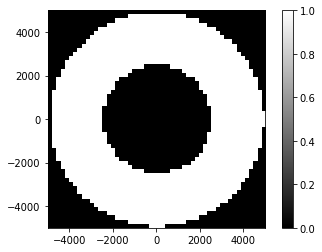

In [75]:
plt.imshow(mask, extent=extension, cmap='gray')
plt.colorbar()

## Generar una Medida distribuida


In [76]:
widths=(.25*mm, .25*mm)
width_x, width_y = widths

In [77]:
X, Y = np.meshgrid(x_sampling, y_sampling)
MD = np.exp(-(X**2) / (2 * width_x**2) - (Y**2) / (2 * width_y**2))


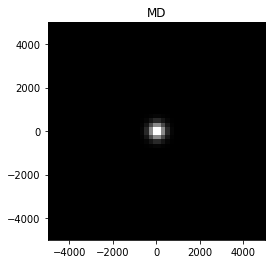

In [78]:
plt.imshow(MD, extent=extension, cmap='gray')
plt.title('MD')

## Determinar número de sensores

In [79]:
num_sensors = 10

## Posición inicial de los sensores
Tenemos que poner los sensores, pero en posiciones aleatorias dentro de la zona activa (1)

In [80]:
from phython_kriging.utils_math import nearest, nearest2

In [81]:
sensors = np.zeros((num_sensors,4))
i_pos_sensors = np.zeros((num_sensors, 2))


In [82]:
for i in range(num_sensors):
    is_mask = 0

    while is_mask==0:

        x0 = x_sampling[0] + x_range * np.random.rand()
        y0 = y_sampling[0] + y_range * np.random.rand()

        i_x0, x0_real, _ = nearest(x_sampling, x0)
        i_y0, y0_real, _ = nearest(y_sampling, y0)
        is_mask = mask[i_x0, i_y0]  #podria ser al reves, verificar

    sensors[i,:]=[x0_real,y0_real, 0, 0]
    i_pos_sensors[i, :] = [i_x0, i_y0]

print(sensors)
print(i_pos_sensors)

[[ -882.3529  2843.1373     0.         0.    ]
 [-1470.5882 -3039.2157     0.         0.    ]
 [-3823.5294  2254.902      0.         0.    ]
 [ 3235.2941   294.1176     0.         0.    ]
 [ 4215.6863  2647.0588     0.         0.    ]
 [-1666.6667  3431.3725     0.         0.    ]
 [   98.0392 -2647.0588     0.         0.    ]
 [ 3823.5294   686.2745     0.         0.    ]
 [-4215.6863 -1078.4314     0.         0.    ]
 [-3039.2157   686.2745     0.         0.    ]]
[[21. 40.]
 [18. 10.]
 [ 6. 37.]
 [42. 27.]
 [47. 39.]
 [17. 43.]
 [26. 12.]
 [45. 29.]
 [ 4. 20.]
 [10. 29.]]


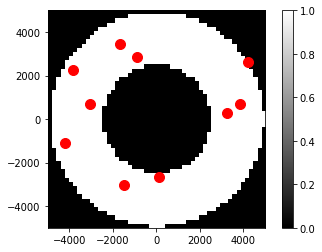

In [83]:
plt.imshow(mask, extent=extension, cmap='gray')
plt.plot(sensors[:, 0], sensors[:, 1], 'ro')
plt.colorbar()

## Determinar error: kriging standard

In [84]:
from phyton_kriging import np, plt

from phyton_kriging.variogram_1D import theoretical
#from phyton_kriging.variogram_2D import theoretical
from phyton_kriging.standard_2D import kriging2D

In [85]:
h = np.linspace(0, 10*mm, 1000)


name = gauss

h: min - 0.0, max - 10000.0
variogram: min - 0.0625, max - 1.0605695458637723
parameters = {'sc': 0.25, 'A': 1, 'lc': 4000, 'power': None}



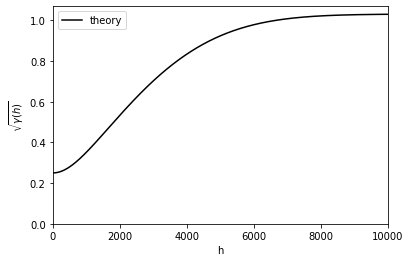

In [86]:
sc = .25
I0 = .00001

# var_theo = theoretical(h=h, make_2D=False)
var_theo = theoretical(h=h)
var_theo.gauss(sc=sc, A=1, lc=4*mm)
var_theo.draw()
print(var_theo)

In [87]:
X_sampling, Y_sampling = np.meshgrid(x_sampling, y_sampling)
sampling2D = (x_sampling, y_sampling)
Sampling2D = (X_sampling, Y_sampling)

In [88]:
print(x_sampling.shape)

(52,)


In [89]:
krig1 = kriging2D(sensors=sensors, variogram=var_theo, sampling=sampling2D)

In [90]:
krig1.standard()

52 52


In [91]:
# TODO: meter mask en python_kriging.

In [92]:
krig1.error = krig1.error * mask

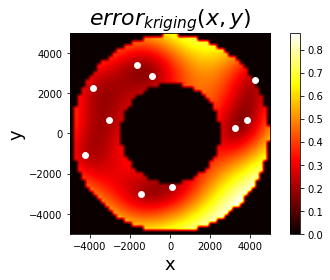

In [93]:
krig1.draw('error')

## Kriging por convolucion

In [105]:
from phyton_kriging.convolution_2D import Convolution_2D

In [106]:
krig_conv = Convolution_2D(sensors=sensors,
                           variogram=var_theo,
                           sampling=sampling2D)


52 52


In [107]:
krig_conv.compute_DM()
krig_conv.normalize_DM()
krig_conv.compute_NEQ()
krig_conv.compute_error_convolution()


In [108]:
# krig_conv.error_conv = krig_conv.error_conv * mask


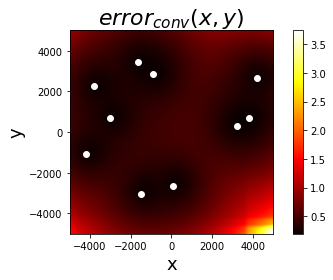

In [109]:
krig_conv.draw('error_convolution')

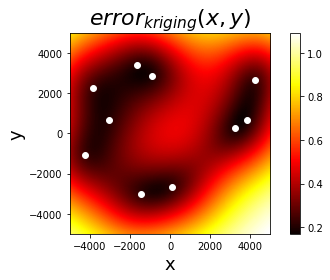

In [110]:
# krig_conv.error = krig_conv.error * mask

krig_conv.draw('error_kriging')

## Funciones de mérito

In [166]:
def merit_function_1(error, verbose=False):

    MF1 = error.max()

    if verbose is True:
        print("MF1  max: " + str(MF1))


    return MF1


def merit_function_2(error, verbose=False):

    MF2 = error.mean()

    if verbose is True:
        print("MF2 mean: " + str(MF2))

    return MF2

In [167]:
error_krig_masked = np.ma.array(krig_conv.error, mask=1 - mask, fill_value=0)
error_krig_conv_masked = np.ma.array(krig_conv.error_conv,
                                     mask=1 - mask,
                                     fill_value=0)


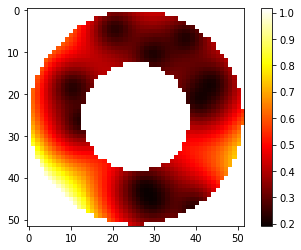

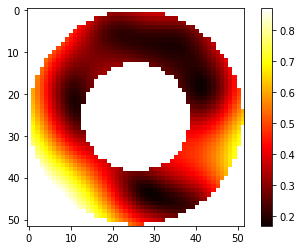

In [168]:
plt.figure()
plt.imshow(error_krig_conv_masked)
plt.colorbar()

plt.figure()
plt.imshow(error_krig_masked)
plt.colorbar()

In [169]:
merit_function_1(error_krig_masked, verbose=True)
merit_function_2(error_krig_masked, verbose=True)

merit_function_1(error_krig_conv_masked, verbose=True)
merit_function_2(error_krig_conv_masked, verbose=True)

MF1  max: 0.8711301471851489
MF2 mean: 0.38396539491345716
MF1  max: 1.0158644279905635
MF2 mean: 0.4158362826798243


## Optimización

In [177]:
num_loops = 50

i = 1

error_masked = error_krig_masked

# location of maximum error
error_max = error_masked.max()
i_max, j_max = np.unravel_index(error_masked.argmax(), error_masked.shape)

# location of minimum error
error_min = error_masked.min()
i_min, j_min = np.unravel_index(error_masked.argmin(), error_masked.shape)

#comprobación de que sacamos bien las posiciones de los máximos.
print(error_max, i_max, j_max, x_sampling[i_max], y_sampling[j_max],
      error_masked[i_max,j_max])

#comprobación de que sacamos bien las posiciones de los minimos.
print(error_min, i_min, j_min, x_sampling[i_min], y_sampling[j_min],
      error_masked[i_min, j_min])


0.8711301471851489 43 7 3431.3725490196084 -3627.4509803921565 0.8711301471851489
0.16886510438700872 44 29 3627.4509803921574 686.2745098039222 0.16886510438700872


In [ ]:



    error_ir=error_ir.*mascara;
    emax=max(max(error_ir))  ;
    [imax,jmax]=find(error_ir==emax);
    imax=imax(1);
    jmax=jmax(1);

    %posición de mínimo error
    tmp=error_ir+100*abs(1-mascara);
    emin=min(tmp(:))  ;  %lo último lo hacemos para que no salga de la máscara
    [imin,jmin]=find(error_ir==emin);
    imin=imin(1);
    jmin=jmin(1);
    %sensor que está más cerca de donde hay mínimo error
    distancias=[(xsensores-xsampling(imin)).^2+(ysensores-ysampling(jmin)).^2];
    mascercano=sortrows([distancias', [1:nsensoresINICIAL]',xsensores',ysensores'],1);
    mascercano=mascercano(1,:);
    ielegido=mascercano(2);

    %buscar entre los más cercanos
    %elijo entre los más cercnaos para acercar

    %         distancias=[(xsensores-xsampling(imax)).^2+(ysensores-ysampling(jmax)).^2];
    %         mascercano=sortrows([distancias', [1:nsensoresINICIAL]',xsensores',ysensores'],1);
    %         mascercano=mascercano([1:ncercanos],:);
    %         elegir=ceil(ncercanos*rand(1,1));
    %         mascercano=mascercano(elegir,:);
    %         ielegido=mascercano(2);


    Nx=cercano(xsampling,xsensores(ielegido));
    Ny=cercano(ysampling,ysensores(ielegido));

    if mascara(Nx,Ny)==0
    %    break
    end


    %posicion cambiada
    lambdax=(1+0.00*rand(1,1)+0.0*randn(1,1))./abs(kk).^.25;
    lambday=lambdax;

    xsensores(ielegido)=  xsensores(ielegido)+lambdax*( xsampling(imax)- xsensores(ielegido));
    ysensores(ielegido)=  ysensores(ielegido)+lambday*( ysampling(jmax)- ysensores(ielegido));

    %estimación nuevo error


    %posicionar sensores
    PosSensores=zeros(size(XSampling));
    Nx=cercano(xsampling,xsensores);
    Ny=cercano(ysampling,ysensores);
    for i=1:length(Nx)
        PosSensores(Nx(i),Ny(i))=PosSensores(Nx(i),Ny(i))+1;
    end

    %calculo del error
    NEQ_ir=conv2(PosSensores,DM,'same');
    error_ir=sqrt(I0.^2+sc.^2./NEQ_ir);
end


In [ ]:
%% Bucle de optimización

ncercanos=10;
kk=1:15;
for kk=1:max(kk)
    for kkk=1:50
        %posición de máximo error
        error_ir=error_ir.*mascara;
        emax=max(max(error_ir))  ;
        [imax,jmax]=find(error_ir==emax);
        imax=imax(1);
        jmax=jmax(1);

        %posición de mínimo error
        tmp=error_ir+100*abs(1-mascara);
        emin=min(tmp(:))  ;  %lo último lo hacemos para que no salga de la máscara
        [imin,jmin]=find(error_ir==emin);
        imin=imin(1);
        jmin=jmin(1);
        %sensor que está más cerca de donde hay mínimo error
        distancias=[(xsensores-xsampling(imin)).^2+(ysensores-ysampling(jmin)).^2];
        mascercano=sortrows([distancias', [1:nsensoresINICIAL]',xsensores',ysensores'],1);
        mascercano=mascercano(1,:);
        ielegido=mascercano(2);

        %buscar entre los más cercanos
        %elijo entre los más cercnaos para acercar

        %         distancias=[(xsensores-xsampling(imax)).^2+(ysensores-ysampling(jmax)).^2];
        %         mascercano=sortrows([distancias', [1:nsensoresINICIAL]',xsensores',ysensores'],1);
        %         mascercano=mascercano([1:ncercanos],:);
        %         elegir=ceil(ncercanos*rand(1,1));
        %         mascercano=mascercano(elegir,:);
        %         ielegido=mascercano(2);


        Nx=cercano(xsampling,xsensores(ielegido));
        Ny=cercano(ysampling,ysensores(ielegido));

        if mascara(Nx,Ny)==0
        %    break
        end


        %posicion cambiada
        lambdax=(1+0.00*rand(1,1)+0.0*randn(1,1))./abs(kk).^.25;
        lambday=lambdax;

        xsensores(ielegido)=  xsensores(ielegido)+lambdax*( xsampling(imax)- xsensores(ielegido));
        ysensores(ielegido)=  ysensores(ielegido)+lambday*( ysampling(jmax)- ysensores(ielegido));

        %estimación nuevo error


        %posicionar sensores
        PosSensores=zeros(size(XSampling));
        Nx=cercano(xsampling,xsensores);
        Ny=cercano(ysampling,ysensores);
        for i=1:length(Nx)
            PosSensores(Nx(i),Ny(i))=PosSensores(Nx(i),Ny(i))+1;
        end

        %calculo del error
        NEQ_ir=conv2(PosSensores,DM,'same');
        error_ir=sqrt(I0.^2+sc.^2./NEQ_ir);
    end
    %movimiento aleatorio
    xsensores=xsensores+.00*rand(size(xsensores))./sqrt(kk);
    ysensores=ysensores+.00*rand(size(ysensores))./sqrt(kk);

    malos=(error_ir>errorUmbral).*mascara';
    area_malos=sum(malos(:))/Area*100;

    factorOptimizacion=area_malos;
   q=error_ir(:);
fluctuaciones=std(q(find(q>0)));
    titulo=strcat('e_T_H=',num2str(errorUmbral),', fopt=',num2str(factorOptimizacion),', fluct=',num2str(fluctuaciones));
    IDerror=imagen((mascara').*error_ir',1-gray,xsampling,ysampling,'x','y',titulo,IDerror);
    hold on
    IDP=plot3(xsensores,ysensores,-0.0*ones(size(xsensores)),'bo');
    set(IDP,'LineWidth',3,'MarkerSize',3)
    refresh
    drawnow
end